# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating querly url with unit as imperial
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url_api = f"{url}&appid={weather_api_key}&units={unit}&q="

# List for results
lon = []
lat = []
cities_found = []
cloudiness = []
temp = []
humidity = []
wind_speed = []
date = []
country = []


for city in cities:
    
    query_url = query_url_api + city
    response = requests.get(query_url)
    response_json = response.json()
    try:
        #response = requests.get(query_url + city).json()
        lat.append( response_json["coord"]["lat"])
        lon.append( response_json["coord"]["lon"])
        temp.append( response_json["main"]["temp_max"])
        humidity.append( response_json["main"]["humidity"])
        cloudiness.append( response_json["clouds"]["all"])
        wind_speed.append( response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append( response_json["dt"])
        cities_found.append(city)
        print(f"City found: {city}")
    except Exception as err:
        print(f"City NOT found: {city}, {err}")




        

City found: tasiilaq
City found: blagodatnoye
City found: rikitea
City found: busselton
City found: khed
City found: vaini
City found: faanui
City found: north bend
City NOT found: saleaula, 'coord'
City found: jamestown
City found: tiksi
City found: mataura
City found: albany
City found: punta arenas
City NOT found: taolanaro, 'coord'
City found: ibra
City found: port alfred
City found: hithadhoo
City NOT found: belushya guba, 'coord'
City found: adrar
City found: torbay
City found: avarua
City found: lagoa
City found: hervey bay
City found: river falls
City found: port elizabeth
City found: saint-philippe
City NOT found: illoqqortoormiut, 'coord'
City found: ushuaia
City NOT found: mys shmidta, 'coord'
City found: ravar
City found: pyaozerskiy
City found: madras
City found: bethel
City found: okitipupa
City found: arlit
City found: nalut
City found: kabanjahe
City found: choix
City found: kajaani
City NOT found: tsihombe, 'coord'
City found: atuona
City found: guerrero negro
City fou

City found: upernavik
City found: rocha
City found: khorixas
City found: norman wells
City found: sistranda
City found: geraldton
City found: vilhena
City found: baillif
City found: olafsvik
City found: luderitz
City found: tiarei
City found: luena
City found: le mars
City found: wladyslawowo
City found: loandjili
City found: portland
City found: athens
City found: coquimbo
City NOT found: tabulbah, 'coord'
City found: gao
City found: sokolac
City found: wajid
City found: aksarka
City found: gwadar
City found: mandurah
City found: shingu
City found: jhudo
City found: zhangye
City found: passos
City found: suba
City found: shimoda
City found: umarizal
City found: cockburn town
City found: zhezkazgan
City found: finschhafen
City found: tungor
City found: dubbo
City found: acarau
City found: cap-aux-meules
City found: miri
City found: hami
City found: rio negrinho
City found: takoradi
City found: shamkhal
City found: oyama
City NOT found: sentyabrskiy, 'coord'
City found: havelock
City fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({"City": cities_found,
                         "Max Temp":temp,
                         "Cloudiness":cloudiness,
                         "Humidity":humidity,
                         "Wind Speed":wind_speed,
                         "Lat":lat,
                         "Lng":lon,
                         "Country":country,
                         "Date":date,
                          
                         })

In [5]:
city_data

,City,Max Temp,Cloudiness,Humidity,Wind Speed,Lat,Lng,Country,Date
0,tasiilaq,39.20,99,93,9.17,65.61,-37.64,GL,1593123181
1,blagodatnoye,66.20,35,52,6.71,45.40,42.59,RU,1593123181
2,rikitea,74.44,61,83,22.32,-23.12,-134.97,PF,1593123182
3,busselton,51.01,62,76,12.15,-33.65,115.33,AU,1593123146
4,khed,79.90,83,87,2.01,17.72,73.38,IN,1593123182
...,...,...,...,...,...,...,...,...,...
582,kavaratti,81.09,100,79,25.55,10.57,72.64,IN,1593123266
583,teya,57.24,0,83,2.64,60.38,92.63,RU,1593123266
584,ngong,55.40,25,93,6.93,-1.36,36.66,KE,1593123266
585,hamilton,84.99,40,37,9.17,39.18,-84.53,US,1593123168


In [6]:
city_data.to_csv('../output_data/cities_original.csv', index=False)
city_data

,City,Max Temp,Cloudiness,Humidity,Wind Speed,Lat,Lng,Country,Date
0,tasiilaq,39.20,99,93,9.17,65.61,-37.64,GL,1593123181
1,blagodatnoye,66.20,35,52,6.71,45.40,42.59,RU,1593123181
2,rikitea,74.44,61,83,22.32,-23.12,-134.97,PF,1593123182
3,busselton,51.01,62,76,12.15,-33.65,115.33,AU,1593123146
4,khed,79.90,83,87,2.01,17.72,73.38,IN,1593123182
...,...,...,...,...,...,...,...,...,...
582,kavaratti,81.09,100,79,25.55,10.57,72.64,IN,1593123266
583,teya,57.24,0,83,2.64,60.38,92.63,RU,1593123266
584,ngong,55.40,25,93,6.93,-1.36,36.66,KE,1593123266
585,hamilton,84.99,40,37,9.17,39.18,-84.53,US,1593123168


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
remove_humidity_df = city_data[(city_data['Humidity']>100)]
remove_humidity_df

,City,Max Temp,Cloudiness,Humidity,Wind Speed,Lat,Lng,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data.loc[list(set(city_data.index) - set(remove_humidity_df.index))]

In [13]:
# Extract relevant fields from the data frame

relevant_fields = city_data[["City","Humidity","Lat","Lng","Date","Cloudiness","Country","Wind Speed", "Max Temp"]]


# Export the City_Data into a csv
relevant_fields.to_csv("../output_data/cities.csv", index=False)

relevant_fields.head()


,City,Humidity,Lat,Lng,Date,Cloudiness,Country,Wind Speed,Max Temp
0,tasiilaq,93,65.61,-37.64,1593123181,99,GL,9.17,39.20
1,blagodatnoye,52,45.40,42.59,1593123181,35,RU,6.71,66.20
2,rikitea,83,-23.12,-134.97,1593123182,61,PF,22.32,74.44
3,busselton,76,-33.65,115.33,1593123146,62,AU,12.15,51.01
4,khed,87,17.72,73.38,1593123182,83,IN,2.01,79.90


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

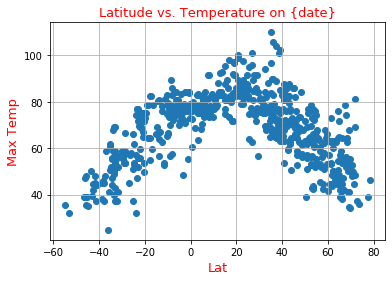

In [14]:
run_date = relevant_fields["Date"].max()
date = datetime.utcfromtimestamp(run_date).strftime('%Y-%m-%d')

# Setting a scatter plot
x = relevant_fields["Lat"]
y = relevant_fields["Max Temp"]
plt.scatter(x,y)

# Adding Titles

plt.title("Latitude vs. Temperature on {date}",fontsize=13, fontweight = 'normal', color= 'red')
plt.xlabel("Lat",fontsize=13, fontweight = 'normal', color= 'red')
plt.ylabel("Max Temp",fontsize=13, fontweight = 'normal', color= 'red')
plt.grid()

plt.savefig(f'../output_data/Latitude vs Temperature on {date}.png')
plt.show()


Observation : Max Temp is higher at the equator and lower at the Northern and Southern Hemisphere.

## Latitude vs. Humidity Plot

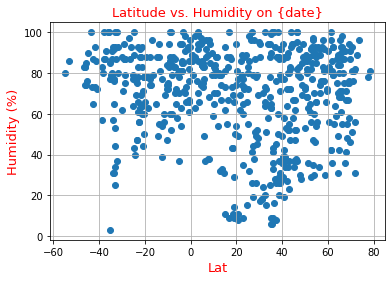

In [15]:

humid = relevant_fields["Humidity"]
plt.scatter(x,humid)

# Adding Titles
plt.title("Latitude vs. Humidity on {date}",fontsize=13, fontweight = 'normal', color= 'red')
plt.xlabel("Lat",fontsize=13, fontweight = 'normal', color= 'red')
plt.ylabel("Humidity (%)",fontsize=13, fontweight = 'normal', color= 'red')
plt.grid()
# Saving the image
plt.savefig(f'../output_data/Latitude vs Humidity on {date}.png')
plt.show()


## Latitude vs. Cloudiness Plot

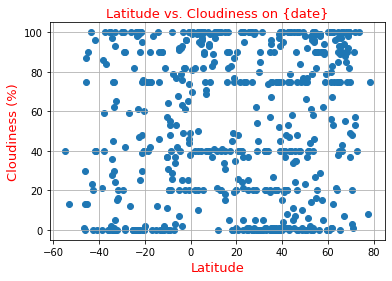

In [16]:
cloud = relevant_fields["Cloudiness"]
plt.scatter(x,cloud)

# Adding Titles
plt.title("Latitude vs. Cloudiness on {date}",fontsize=13, fontweight = 'normal', color= 'red')
plt.xlabel("Latitude",fontsize=13, fontweight = 'normal', color= 'red')
plt.ylabel("Cloudiness (%)",fontsize=13, fontweight = 'normal', color= 'red')
plt.grid()

# Saving the image
plt.savefig(f'../output_data/Latitude vs Cloudiness on {date}.png')
plt.show()


## Latitude vs. Wind Speed Plot

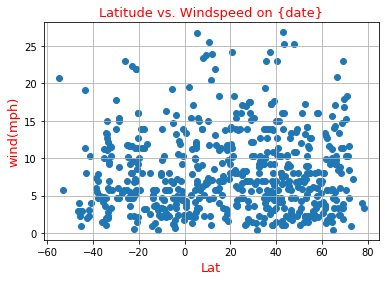

In [17]:
wind = relevant_fields["Wind Speed"]
plt.scatter(x,wind)

# Adding Titles
plt.title("Latitude vs. Windspeed on {date}",fontsize=13, fontweight = 'normal', color= 'red')
plt.xlabel("Lat",fontsize=13, fontweight = 'normal', color= 'red')
plt.ylabel("wind(mph)",fontsize=13, fontweight = 'normal', color= 'red')
plt.grid()

# Saving the image
plt.savefig(f'../output_data/Latitude vs Windspeed on {date}.png')
plt.show()


## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearRegression(x_values,y_values,reg_x,reg_y,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_value = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regression_value,"r-")
    print(f' r squared is: {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(reg_x,reg_y),fontsize=20,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_label}')
    plt.grid()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_data.loc[city_data["Lat"]> 0]
southern_hemisphere_df = city_data.loc[city_data["Lat"]< 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 r squared is: -0.6874983597400258
y = -0.5x + 89.94


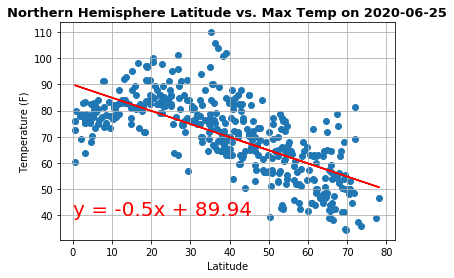

In [20]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
reg_x = 0
reg_y = 40
y_label = "Temperature (F)"
plt.title(f'Northern Hemisphere Latitude vs. Max Temp on {date}',fontsize=13, fontweight = 'bold')
linearRegression(x_values,y_values,reg_x,reg_y,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Max Temp on {date}.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 r squared is: 0.7901188858734988
y = 0.86x + 81.25


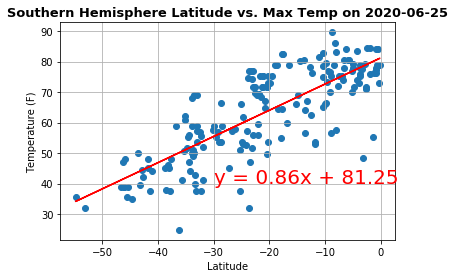

In [21]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
reg_x = -30
reg_y =40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs. Max Temp on {date}',fontsize=13, fontweight = 'bold')
linearRegression(x_values,y_values,reg_x,reg_y,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Max Temp on {date}.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 r squared is: 0.019518105493918556
y = 0.02x + 66.17


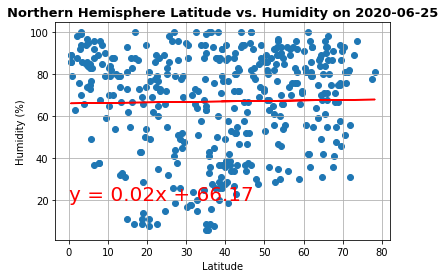

In [22]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
reg_x = 0
reg_y = 20
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs. Humidity on {date}',fontsize=13, fontweight = 'bold')
linearRegression(x_values,y_values,reg_x,reg_y,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {date}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 r squared is: -0.012860480922123375
y = -0.02x + 75.1


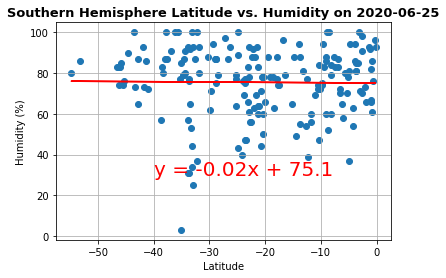

In [23]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
reg_x = -40
reg_y = 30
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs. Humidity on {date}',fontsize=13, fontweight = 'bold')
linearRegression(x_values,y_values,reg_x,reg_y,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on {date}.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 r squared is: -0.0017388923554546138
y = -0.0x + 53.23


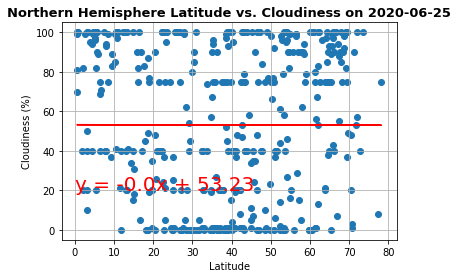

In [24]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
reg_x = 0
reg_y = 20
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs. Cloudiness on {date}',fontsize=13, fontweight = 'bold')
linearRegression(x_values,y_values,reg_x,reg_y,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {date}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 r squared is: 0.12288411716543689
y = 0.34x + 53.74


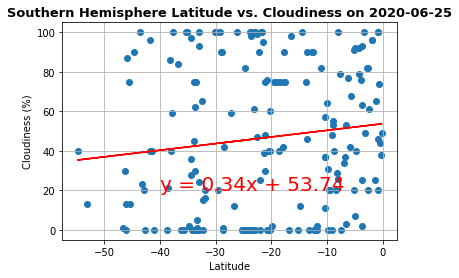

In [25]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
reg_x = -40
reg_y =20
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs. Cloudiness on {date}',fontsize=13, fontweight = 'bold')
linearRegression(x_values,y_values,reg_x,reg_y,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {date}.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 r squared is: -0.09694834641660335
y = -0.03x + 9.43


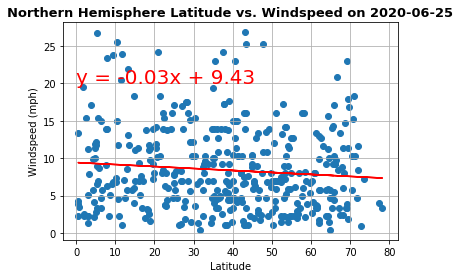

In [26]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
reg_x = 0
reg_y = 20
y_label = "Windspeed (mph)"
plt.title(f'Northern Hemisphere Latitude vs. Windspeed on {date}', fontsize=13, fontweight = 'bold')
linearRegression(x_values,y_values,reg_x,reg_y,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Windspeed on {date}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 r squared is: -0.06762928462615947
y = -0.02x + 6.74


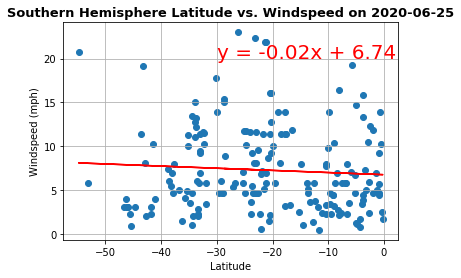

In [27]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
reg_x =-30
reg_y =20
y_label = "Windspeed (mph)"
plt.title(f'Southern Hemisphere Latitude vs. Windspeed on {date}',fontsize=13, fontweight = 'bold')
linearRegression(x_values,y_values,reg_x,reg_y,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Windspeed on {date}.png')
plt.show()